In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.log2(1 + np.exp(-M))


# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(x, w) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))




In [15]:
data_x = [(3.0, 4.9), (2.7, 3.9), (3.0, 5.5), (2.6, 4.0), (2.9, 4.3), (3.1, 5.1), (2.2, 4.5), (2.3, 3.3), (2.7, 5.1), (3.3, 5.7), (2.8, 5.1), (2.8, 4.9), (2.5, 4.5), (2.8, 4.7), (3.2, 4.7), (3.2, 5.7), (2.8, 6.1), (3.6, 6.1), (2.8, 4.8), (2.9, 4.5), (3.1, 4.9), (2.3, 4.4), (3.3, 6.0), (2.6, 5.6), (3.0, 4.4), (2.9, 4.7), (2.8, 4.0), (2.5, 5.8), (2.4, 3.3), (2.8, 6.7), (3.0, 5.1), (2.3, 4.0), (3.1, 5.5), (2.8, 4.8), (2.7, 5.1), (2.5, 4.0), (3.1, 4.4), (3.8, 6.7), (3.1, 5.6), (3.1, 4.7), (3.0, 5.8), (3.0, 5.2), (3.0, 4.5), (2.7, 4.9), (3.0, 6.6), (2.9, 4.6), (3.0, 4.6), (2.6, 3.5), (2.7, 5.1), (2.5, 5.0), (2.0, 3.5), (3.2, 5.9), (2.5, 5.0), (3.4, 5.6), (3.4, 4.5), (3.2, 5.3), (2.2, 4.0), (2.2, 5.0), (3.3, 4.7), (2.7, 4.1), (2.4, 3.7), (3.0, 4.2), (3.2, 6.0), (3.0, 4.2), (3.0, 4.5), (2.7, 4.2), (2.5, 3.0), (2.8, 4.6), (2.9, 4.2), (3.1, 5.4), (2.5, 4.9), (3.2, 5.1), (2.8, 4.5), (2.8, 5.6), (3.4, 5.4), (2.7, 3.9), (3.0, 6.1), (3.0, 5.8), (3.0, 4.1), (2.5, 3.9), (2.4, 3.8), (2.6, 4.4), (2.9, 3.6), (3.3, 5.7), (2.9, 5.6), (3.0, 5.2), (3.0, 4.8), (2.7, 5.3), (2.8, 4.1), (2.8, 5.6), (3.2, 4.5), (3.0, 5.9), (2.9, 4.3), (2.6, 6.9), (2.8, 5.1), (2.9, 6.3), (3.2, 4.8), (3.0, 5.5), (3.0, 5.0), (3.8, 6.4)]
data_y = [1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])   # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 1000  # число итераций алгоритма SGD


Qe = np.mean(df(w,x_train,y_train))# начальное значение среднего эмпирического риска
print(f"{Qe=}")
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

Qe=np.float64(-0.17985598176415743)


In [17]:
# Обучение (SGD по одной точке)
Qe_hist = []
for i in range(N):
    k = np.random.randint(0, n_train-1) # n_train - размер выборки (массива x_train)
    ek = loss(w,x_train[k],y_train[k])
    w = w - nt * df(w, x_train[k], y_train[k])
    Qe = lm * ek + (1 - lm) * Qe
    Qe_hist.append(Qe)

# Q = average_risk(w, S, coord_y)
print(f"{Qe=},{w=}")

Qe=np.float64(0.4314873738596818),w=array([-11.97079972,  -0.3114022 ,   2.71940293])


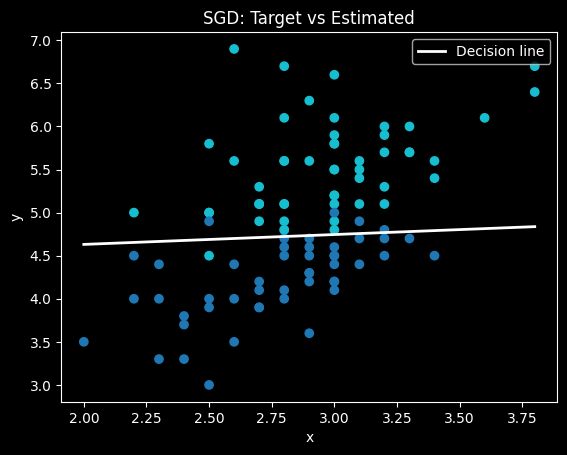

In [27]:
# График: цель и модель (SGD)
xs = np.array([p[0] for p in data_x])
ys = np.array([p[1] for p in data_x])

plt.scatter(xs, ys,c=data_y, cmap="tab10")

# линия w0 + w1*x1 + w2*x2 = 0  =>  x2 = -(w0 + w1*x1)/w2
x_line = np.linspace(xs.min(), xs.max(), 200)
x2_line = -(w[0] + w[1]*x_line) / w[2]
plt.plot(x_line, x2_line, color="white", linewidth=2, label="Decision line")
plt.plot()
plt.title("SGD: Target vs Estimated")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


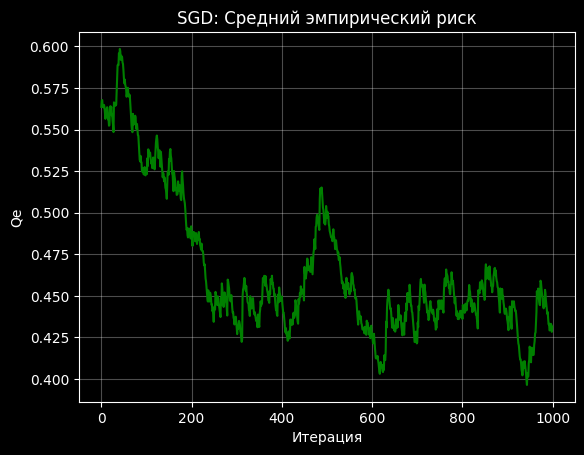

In [26]:
# График: изменение среднего эмпирического риска (SGD)
plt.plot(Qe_hist, color='green')
plt.title("SGD: Средний эмпирический риск")
plt.xlabel("Итерация")
plt.ylabel("Qe")
plt.grid(True, alpha=0.3)
plt.show()